# Imports

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import random as rn
import seaborn as sb
sb.set_style(style="whitegrid")
sb.set_color_codes()
import scipy.ndimage
from scipy.interpolate import griddata
import numpy.ma as ma
from numpy.random import uniform, seed
from google.colab import files

# Single Blob

## Data Preparation


### Data Generation

In [2]:
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
Nobjs = 500
np.random.seed(1)
x, y = np.random.multivariate_normal(mean, cov, Nobjs).T
#Add manual outlier
x[0]=3.3
y[0]=3.3
X=np.array([x,y]).T

### Data Visualisation

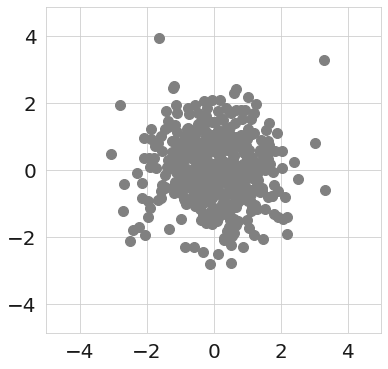

In [3]:
fig=plt.figure(figsize=(6,6))
fig.add_subplot(111)
plt.plot(X[:,0],X[:,1],'o', markersize=10, color=[0.5,0.5,0.5])
plt.grid("off")
plt.axis("equal")
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.tick_params(direction='out', length=6, width=2, colors='k',labelsize=20)
plt.show()

### Saving in csv 

In [4]:
label=np.zeros(500, int)
label[0]=1

dict={'1':x, '2':y, 'label':label}
df=pd.DataFrame(dict)

df.to_csv('SingleBlob.csv', sep='\t')
files.download("SingleBlob.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Train iForest on Data

This process is done on local machine.

## Obtain Anomaly Scores

In [5]:
files.upload()

Saving SingleBlob_tested_over_SingleBlob.csv to SingleBlob_tested_over_SingleBlob.csv


{'SingleBlob_tested_over_SingleBlob.csv': b'pointId Ascore actuallabel\n0 0.817841 1\n1 0.336717 0\n2 0.566203 0\n3 0.496974 0\n4 0.418659 0\n5 0.568721 0\n6 0.357721 0\n7 0.474559 0\n8 0.364935 0\n9 0.44884 0\n10 0.448955 0\n11 0.505314 0\n12 0.445895 0\n13 0.372953 0\n14 0.421134 0\n15 0.334349 0\n16 0.323379 0\n17 0.363473 0\n18 0.391981 0\n19 0.561737 0\n20 0.36111 0\n21 0.474839 0\n22 0.384322 0\n23 0.53798 0\n24 0.457308 0\n25 0.413261 0\n26 0.341282 0\n27 0.43072 0\n28 0.526441 0\n29 0.485134 0\n30 0.448935 0\n31 0.430336 0\n32 0.438314 0\n33 0.574603 0\n34 0.54741 0\n35 0.348714 0\n36 0.474302 0\n37 0.486981 0\n38 0.43853 0\n39 0.474329 0\n40 0.375312 0\n41 0.450046 0\n42 0.43 0\n43 0.392116 0\n44 0.48549 0\n45 0.500157 0\n46 0.344223 0\n47 0.443881 0\n48 0.383084 0\n49 0.417294 0\n50 0.454209 0\n51 0.479459 0\n52 0.382985 0\n53 0.445225 0\n54 0.385036 0\n55 0.414475 0\n56 0.447291 0\n57 0.4319 0\n58 0.406392 0\n59 0.513216 0\n60 0.372856 0\n61 0.604146 0\n62 0.512331 0\n63 0.5

In [6]:
data = pd.read_csv("SingleBlob_tested_over_SingleBlob.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()

### Visualise scores

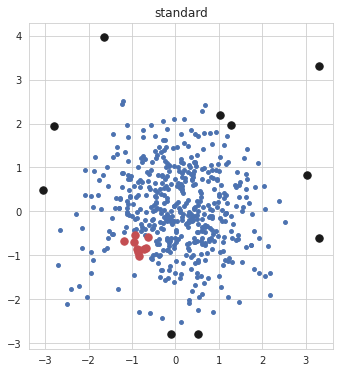

In [7]:
ss0=np.argsort(S0)


f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss0[-10:]],y[ss0[-10:]],s=55,c='k')
plt.scatter(x[ss0[:10]],y[ss0[:10]],s=55,c='r')
plt.title('standard')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'standard')

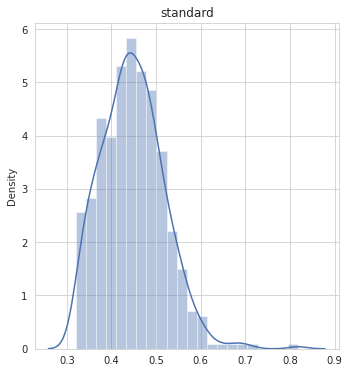

In [8]:
f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.distplot(S0, kde=True, color="b")
plt.title('standard')


## Score Maps

In [9]:
xx, yy = np.meshgrid(np.linspace(-5., 5., 30), np.linspace(-5., 5, 30))
X_in=np.c_[xx.ravel(), yy.ravel()]

label=np.zeros(900, int)

dict={'1':X_in[:, 0], '2':X_in[:, 1], 'label':label}
df=pd.DataFrame(dict)

df.to_csv('SingleBlob_heatmap.csv', sep='\t')
files.download("SingleBlob_heatmap.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
files.upload()



Saving SingleBlob_heatmap_tested_over_SingleBlob.csv to SingleBlob_heatmap_tested_over_SingleBlob.csv


{'SingleBlob_heatmap_tested_over_SingleBlob.csv': b'pointId Ascore actuallabel\n0 1 0\n1 1 0\n2 1 0\n3 1 0\n4 1 0\n5 1 0\n6 0.928705 0\n7 0.862636 0\n8 0.839822 0\n9 0.82104 0\n10 0.802562 0\n11 0.786422 0\n12 0.774824 0\n13 0.76816 0\n14 0.768412 0\n15 0.775756 0\n16 0.791965 0\n17 0.806994 0\n18 0.819791 0\n19 0.832589 0\n20 0.845387 0\n21 0.861047 0\n22 0.884078 0\n23 0.895288 0\n24 0.92691 0\n25 1 0\n26 1 0\n27 1 0\n28 1 0\n29 1 0\n30 1 0\n31 1 0\n32 1 0\n33 1 0\n34 1 0\n35 1 0\n36 0.928705 0\n37 0.862636 0\n38 0.839822 0\n39 0.82104 0\n40 0.802562 0\n41 0.786422 0\n42 0.774824 0\n43 0.76816 0\n44 0.768412 0\n45 0.775756 0\n46 0.791965 0\n47 0.806994 0\n48 0.819791 0\n49 0.832589 0\n50 0.845387 0\n51 0.861047 0\n52 0.884078 0\n53 0.895288 0\n54 0.92691 0\n55 1 0\n56 1 0\n57 1 0\n58 1 0\n59 1 0\n60 1 0\n61 1 0\n62 1 0\n63 1 0\n64 1 0\n65 1 0\n66 0.928705 0\n67 0.862636 0\n68 0.839822 0\n69 0.82104 0\n70 0.802562 0\n71 0.786422 0\n72 0.774824 0\n73 0.76816 0\n74 0.768412 0\n75 0.7757

In [11]:
data = pd.read_csv("SingleBlob_heatmap_tested_over_SingleBlob.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()
S0 = S0.reshape(xx.shape)

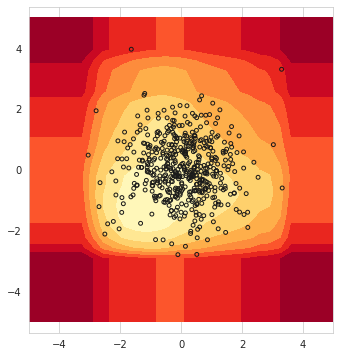

In [12]:
f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
levels = np.linspace(np.min(S0),np.max(S0),10)
CS = ax1.contourf(xx, yy, S0, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")

plt.show()

# Multiple Blobs

## Data Preparation

### Data Generation

In [13]:
mean1 = [10, 0]
cov1 = [[1, 0], [0, 1]]  

mean2 = [0, 10]
cov2 = [[1, 0], [0, 1]]

Nobjs = 500          # Size of dataset.
np.random.seed(1)    # Add this for repeatablilty of the experiment. 

x1, y1 = np.random.multivariate_normal(mean1, cov1, int(Nobjs/2)).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, int(Nobjs/2)).T

# join the two clusters so as to make one dataset. 
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))
X=np.array([x,y]).T

### Data Visualisation

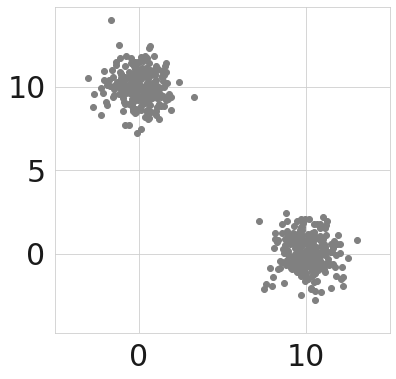

In [14]:
fig=plt.figure(figsize=(6,6))
fig.add_subplot(111)
plt.plot(X[:,0],X[:,1],'o', color=[0.5,0.5,0.5])
plt.grid("off")
plt.axis("equal")

plt.xlim([-5,15])
plt.ylim([-5,15])
plt.tick_params(direction='out', length=6, width=2, colors='k',labelsize=30)

plt.show()

### Save in csv


In [15]:
label=np.zeros(500, int)
label[0]=1

dict={'1':x, '2':y, 'label':label}
df=pd.DataFrame(dict)

df.to_csv('MultipleBlob.csv', sep='\t')
files.download("MultipleBlob.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Train iForest on Data

This part is done on local machine

## Obtain Anomaly Scores

In [16]:
files.upload()

Saving MultipleBlob_tested_over_MultipleBlob.csv to MultipleBlob_tested_over_MultipleBlob.csv


{'MultipleBlob_tested_over_MultipleBlob.csv': b'pointId Ascore actuallabel\n0 0.93408 1\n1 1.07784 0\n2 0.902566 0\n3 0.942524 0\n4 0.885568 0\n5 0.963669 0\n6 0.937152 0\n7 0.940609 0\n8 1.01966 0\n9 0.845766 0\n10 0.846361 0\n11 0.861421 0\n12 0.908013 0\n13 1.03564 0\n14 0.873246 0\n15 0.955502 0\n16 1.04084 0\n17 0.915082 0\n18 0.884747 0\n19 0.890348 0\n20 1.02478 0\n21 0.856013 0\n22 0.93489 0\n23 0.833735 0\n24 0.851338 0\n25 0.903617 0\n26 0.955059 0\n27 0.869438 0\n28 0.865791 0\n29 0.84913 0\n30 0.850399 0\n31 0.885348 0\n32 0.870508 0\n33 0.872797 0\n34 0.926599 0\n35 1.10105 0\n36 0.843947 0\n37 0.986547 0\n38 0.851626 0\n39 0.844884 0\n40 0.920862 0\n41 0.84455 0\n42 0.847528 0\n43 0.875476 0\n44 0.843583 0\n45 0.873989 0\n46 1.006 0\n47 0.863362 0\n48 0.891938 0\n49 0.859376 0\n50 0.846936 0\n51 0.85865 0\n52 0.884437 0\n53 0.937643 0\n54 0.892205 0\n55 0.930097 0\n56 0.925337 0\n57 0.963221 0\n58 1.04605 0\n59 0.868448 0\n60 0.967807 0\n61 0.873438 0\n62 0.868976 0\n63 0

In [17]:
data = pd.read_csv("MultipleBlob_tested_over_MultipleBlob.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()


### Visualise Scores

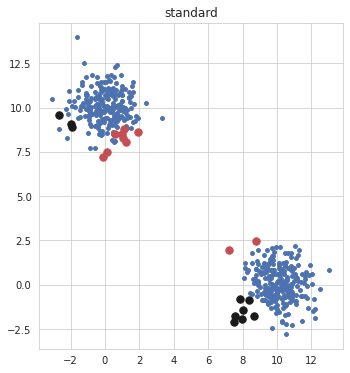

In [18]:
ss0=np.argsort(S0)

f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss0[-10:]],y[ss0[-10:]],s=55,c='k')
plt.scatter(x[ss0[:10]],y[ss0[:10]],s=55,c='r')
plt.title('standard')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'standard')

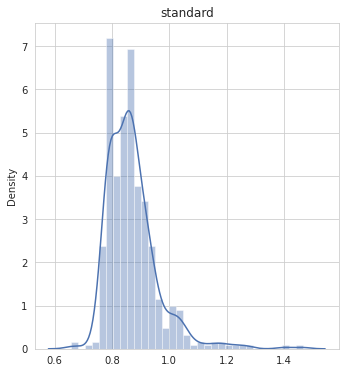

In [19]:
f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.distplot(S0, kde=True, color="b")
plt.title('standard')

## Score Map

In [20]:
xx, yy = np.meshgrid(np.linspace(-5, 15, 30), np.linspace(-5, 15, 30))
X_in=np.c_[xx.ravel(), yy.ravel()]

label=np.zeros(900, int)

dict={'1':X_in[:, 0], '2':X_in[:, 1], 'label':label}
df=pd.DataFrame(dict)

df.to_csv('MultipleBlob_heatmap.csv', sep='\t')
files.download("MultipleBlob_heatmap.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
files.upload()

Saving MultipleBlob_heatmap_tested_over_MultipleBlob.csv to MultipleBlob_heatmap_tested_over_MultipleBlob.csv


{'MultipleBlob_heatmap_tested_over_MultipleBlob.csv': b'pointId Ascore actuallabel\n0 1 0\n1 1 0\n2 1 0\n3 0.896087 0\n4 0.773189 0\n5 0.745356 0\n6 0.727495 0\n7 0.715037 0\n8 0.723402 0\n9 0.740613 0\n10 0.757594 0\n11 0.776213 0\n12 0.790879 0\n13 0.805511 0\n14 0.817233 0\n15 0.828955 0\n16 0.840677 0\n17 0.852399 0\n18 0.864121 0\n19 0.875843 0\n20 0.887565 0\n21 0.89944 0\n22 0.911781 0\n23 0.923038 0\n24 0.935503 0\n25 0.956738 0\n26 0.972338 0\n27 1 0\n28 1 0\n29 1 0\n30 1 0\n31 1 0\n32 1 0\n33 0.896087 0\n34 0.773189 0\n35 0.745356 0\n36 0.727495 0\n37 0.715037 0\n38 0.723402 0\n39 0.740613 0\n40 0.757594 0\n41 0.776213 0\n42 0.790879 0\n43 0.805511 0\n44 0.817233 0\n45 0.828955 0\n46 0.840677 0\n47 0.852399 0\n48 0.864121 0\n49 0.875843 0\n50 0.887565 0\n51 0.89944 0\n52 0.911781 0\n53 0.923038 0\n54 0.935503 0\n55 0.956738 0\n56 0.972338 0\n57 1 0\n58 1 0\n59 1 0\n60 1 0\n61 1 0\n62 1 0\n63 0.896087 0\n64 0.773189 0\n65 0.745356 0\n66 0.727495 0\n67 0.715037 0\n68 0.723402 0

In [22]:
data = pd.read_csv("MultipleBlob_heatmap_tested_over_MultipleBlob.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()
S0 = S0.reshape(xx.shape)

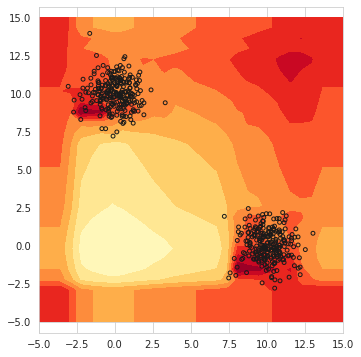

In [23]:
f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
levels = np.linspace(np.min(S0),np.max(S0),10)
CS = ax1.contourf(xx, yy, S0, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")

plt.show()

# Sinusoidal Data

## Data Preparation

### Data Generation

In [24]:
N = 1000
x = np.random.rand(N)*8*np.pi
y = np.sin(x) + np.random.randn(N)/4.
X=np.array([x,y]).T

### Data Visualisation

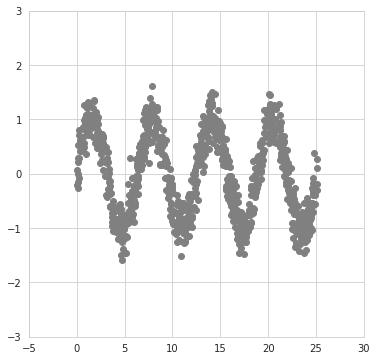

In [25]:
fig=plt.figure(figsize=(6,6))
fig.add_subplot(111)
plt.plot(X[:,0],X[:,1],'o', color=[0.5,0.5,0.5])

plt.xlim([-5,30])
plt.ylim([-3.,3.])

plt.show()

### Save to csv

In [26]:
label=np.zeros(1000, int)
label[0]=1

dict={'1':x, '2':y, 'label':label}
df=pd.DataFrame(dict)

df.to_csv('Sinusoidal.csv', sep='\t')
files.download("Sinusoidal.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Train iForest

This process is done on local machine.

## Obtain Anomaly scores

In [27]:
files.upload()

Saving Sinusoidal_tested_over_Sinusoidal.csv to Sinusoidal_tested_over_Sinusoidal.csv


{'Sinusoidal_tested_over_Sinusoidal.csv': b'pointId Ascore actuallabel\n0 0.981664 1\n1 0.885765 0\n2 0.790043 0\n3 0.986432 0\n4 0.851737 0\n5 0.663691 0\n6 1.0374 0\n7 1.23578 0\n8 0.640235 0\n9 0.866622 0\n10 0.827515 0\n11 0.783977 0\n12 0.828989 0\n13 0.79327 0\n14 0.806903 0\n15 0.681149 0\n16 0.642342 0\n17 0.984537 0\n18 1.08881 0\n19 0.84099 0\n20 0.651863 0\n21 0.787587 0\n22 0.917226 0\n23 0.833025 0\n24 0.642702 0\n25 0.686291 0\n26 0.638438 0\n27 0.683673 0\n28 0.94083 0\n29 0.79314 0\n30 0.915558 0\n31 0.645853 0\n32 1.0731 0\n33 0.759269 0\n34 1.07106 0\n35 0.882768 0\n36 1.37128 0\n37 0.859255 0\n38 0.966691 0\n39 1.01599 0\n40 0.684006 0\n41 0.867506 0\n42 0.794048 0\n43 0.85888 0\n44 0.883075 0\n45 0.792699 0\n46 0.85039 0\n47 0.624954 0\n48 0.764345 0\n49 0.778522 0\n50 0.785785 0\n51 1.08973 0\n52 0.78892 0\n53 0.777939 0\n54 0.848291 0\n55 0.918212 0\n56 1.00277 0\n57 1.04936 0\n58 1.32641 0\n59 0.823834 0\n60 1.30654 0\n61 0.681404 0\n62 1.07501 0\n63 1.17073 0\n6

In [28]:
data = pd.read_csv("Sinusoidal_tested_over_Sinusoidal.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()

### Visualise Scores

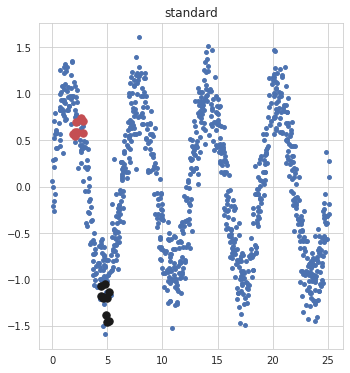

In [29]:
ss0=np.argsort(S0)

f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss0[-10:]],y[ss0[-10:]],s=55,c='k')
plt.scatter(x[ss0[:10]],y[ss0[:10]],s=55,c='r')
plt.title('standard')

plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'standard')

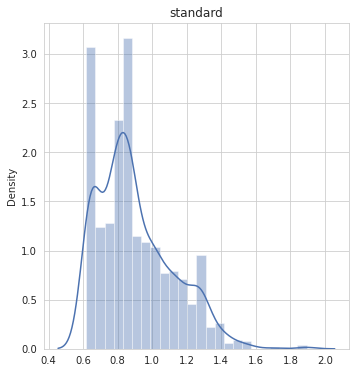

In [30]:
f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.distplot(S0, kde=True, color="b")
plt.title('standard')


## Score Maps

In [31]:
xx, yy = np.meshgrid(np.linspace(-5, 30, 30), np.linspace(-3, 3, 30))
X_in=np.c_[xx.ravel(), yy.ravel()]

label=np.zeros(900, int)

dict={'1':X_in[:, 0], '2':X_in[:, 1], 'label':label}
df=pd.DataFrame(dict)

df.to_csv('Sinusoidal_heatmap.csv', sep='\t')
files.download("Sinusoidal_heatmap.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
files.upload()


Saving Sinusoidal_heatmap_tested_over_Sinusoidal.csv to Sinusoidal_heatmap_tested_over_Sinusoidal.csv


{'Sinusoidal_heatmap_tested_over_Sinusoidal.csv': b'pointId Ascore actuallabel\n0 1 0\n1 1 0\n2 1 0\n3 1 0\n4 1 0\n5 0.767379 0\n6 0.767337 0\n7 0.769615 0\n8 0.771563 0\n9 0.779837 0\n10 0.792791 0\n11 0.807778 0\n12 0.824211 0\n13 0.840659 0\n14 0.861548 0\n15 0.876313 0\n16 0.890719 0\n17 0.9042 0\n18 0.918044 0\n19 0.931436 0\n20 0.94277 0\n21 0.954104 0\n22 0.968557 0\n23 0.980525 0\n24 0.991424 0\n25 1 0\n26 1 0\n27 1 0\n28 1 0\n29 1 0\n30 1 0\n31 1 0\n32 1 0\n33 1 0\n34 1 0\n35 0.767379 0\n36 0.767337 0\n37 0.769615 0\n38 0.771563 0\n39 0.779837 0\n40 0.792791 0\n41 0.807778 0\n42 0.824211 0\n43 0.840659 0\n44 0.861548 0\n45 0.876313 0\n46 0.890719 0\n47 0.9042 0\n48 0.918044 0\n49 0.931436 0\n50 0.94277 0\n51 0.954104 0\n52 0.968557 0\n53 0.980525 0\n54 0.991424 0\n55 1 0\n56 1 0\n57 1 0\n58 1 0\n59 1 0\n60 1 0\n61 1 0\n62 1 0\n63 1 0\n64 1 0\n65 0.767379 0\n66 0.767337 0\n67 0.769615 0\n68 0.771563 0\n69 0.779837 0\n70 0.792791 0\n71 0.807778 0\n72 0.824211 0\n73 0.840659 0\n7

In [34]:
data = pd.read_csv("Sinusoidal_heatmap_tested_over_Sinusoidal.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()
S0 = S0.reshape(xx.shape)

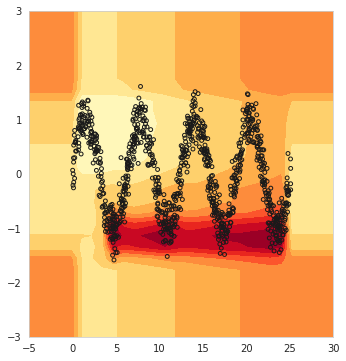

In [35]:
f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
levels = np.linspace(np.min(S0),np.max(S0),10)
CS = ax1.contourf(xx, yy, S0, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')

plt.show()